In [297]:
#import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.misc import imresize

In [308]:
def get_gradient(img, bin_num=180):
    '''
    get the gradient of the image, along y direction
    '''
    img_pad = np.zeros((img.shape[0] + 1, img.shape[1] + 1, 3))
    imgd = np.zeros((img.shape[0], img.shape[1], 3))
    
    img_pad[1:, 1:, :] = img
    img = img_pad
    imgd = np.zeros((img.shape[0] - 1, img.shape[1] - 1, 3))
    
    for i in range(3):
        for j in range(1, img.shape[0]):
            t = img[j, 1:, i] - img[j, 0:-1, i]
            t = np.array(t)
            imgd[j-1,:,i] = t
    imgd = imgd.reshape(imgd.shape[0] * imgd.shape[1] * 3) 
    '''
    # gradient along the x direction
    imgdy = np.zeros((img.shape[0] - 1, img.shape[1] - 1, 3))
    for i in range(3):
        for j in range(1, img.shape[1]):
            t = - img[1:,j, i] + img[0:-1,j, i]
            t = np.array(t)
            imgdy[:,j-1,i] = t
    imgdy = imgdy.reshape(imgdy.shape[0] * imgdy.shape[1] * 3)
    imgd = imgdy 
    '''
    
    '''
    #imgdy_dis = imgdy
    #imgdy_dis = (imgdy_dis - imgdy_dis.min()) / (imgdy_dis.max() - imgdy_dis.min())
    #plt.imshow(imgdy_dis, cmap = 'gray')
    #plt.show()    
    n, bins, patches = plt.hist(imgd, bin_num) #, normed=1, facecolor='green', alpha=0.75)
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1)
    plt.xlabel('Smarts')
    plt.ylabel('Probability')
    plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
    plt.grid(True)
    plt.show()
    '''
    data = imgd 
    y, binEdges = np.histogram(data,bins=bin_num, normed=1)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

    return y, bincenters


In [309]:
def get_scaled_img(img):
    '''
    do 2x2 block average of the original image,
    follow section 2.4
    '''
    imgnew = np.zeros((img.shape[0] / 2, img.shape[1] / 2, 3))
    img = img.astype(float)
    for i in range(0, img.shape[0]-1, 2):
        for j in range(0, img.shape[1]-1, 2):
            imgnew[i/2, j/2, :] = (img[i,j,:] + img[i+1,j,:] + img[i,j+1,:] + img[i+1,j+1,:]) / 4.0
    #imgnew = imgnew.astype('uint8')
    return imgnew

In [320]:
def plot_img_stat(img):
    '''
    function which take the image as input, 
    scale the image and calculate the gradient
    '''
    # img = plt.imread('/users/zengxiaohui/Downloads/messi7.jpg')
    img = img.astype(float)
    img = (img - img.min())/(img.max() - img.min())
    #img = get_scaled_img(img)
    imgnew = get_scaled_img(img)
    #imgnew = get_scaled_img(imgnew)
    #plt.subplot(121),plt.imshow(img, cmap = 'gray')
    #plt.subplot(122),plt.imshow(imgnew, cmap = 'gray')

    bin_num = 180
    y1, line1 = get_gradient(img, bin_num)
    y2, line2 = get_gradient(imgnew, bin_num)
    return y1, y2, line1, line2


In [321]:
def display_img_hist(imgname='images/img0272.png'):
    '''
    function which display the input image and plot the hist curve
    of image in scale 1 and 1/2, 
    '''
    print('displaying: %s'%imgname)
    img = plt.imread(imgname, 0)
    img = img[:,:,0:3]
    y1, y2, line1, line2 = plot_img_stat(img)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    plt.plot(line1,y1,'-')
    plt.plot(line2,y2,'--')
    plt.show()
    

---------- original img: hist of gradient of in scale 1 and 1/2 ----------- 
displaying: images/img0272.png


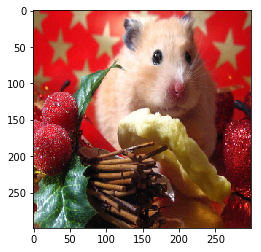

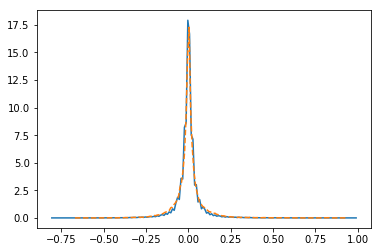

---------- adversarial img(fast2-32): hist of gradient of in scale 1 and 1/2 ----------- 
displaying: images/adv0272_fast2.png


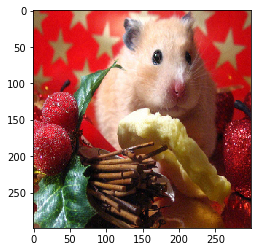

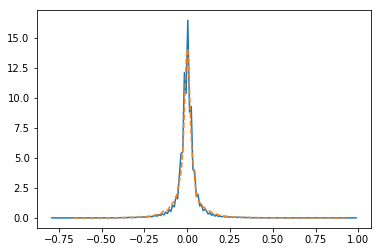

displaying: images/adv0272_fast8.png


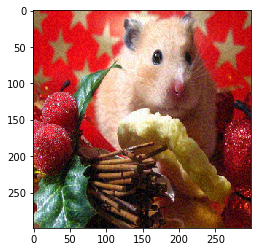

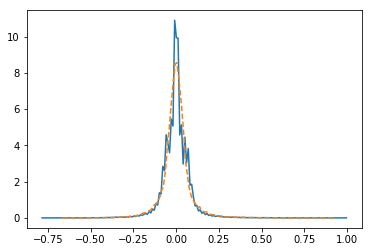

displaying: images/adv0272_fast16.png


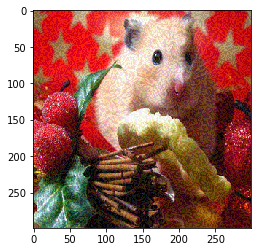

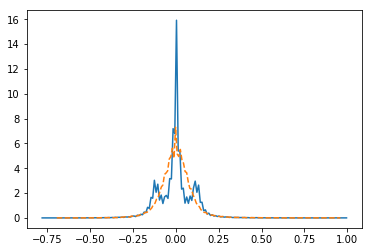

displaying: images/adv0272_fast32.png


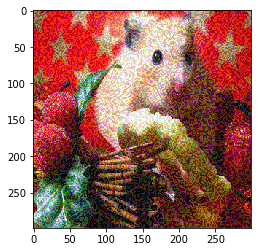

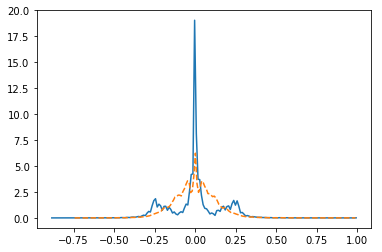

In [322]:
print('---------- original img: hist of gradient of in scale 1 and 1/2 ----------- ')

imgname = 'images/img0272.png'
display_img_hist(imgname)

print('---------- adversarial img(fast2-32): hist of gradient of in scale 1 and 1/2 ----------- ')
display_img_hist('images/adv0272_fast2.png')
display_img_hist('images/adv0272_fast8.png')
display_img_hist('images/adv0272_fast16.png')
display_img_hist('images/adv0272_fast32.png')


---------- original img: hist of gradient of in scale 1 and 1/2 ----------- 
displaying: images/q17.png


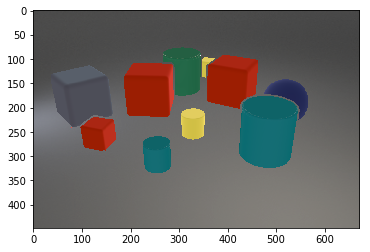

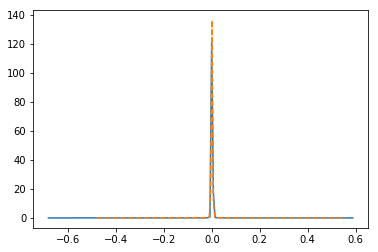

---------- adversarial img(attack img-normal): hist of gradient of in scale 1 and 1/2 ----------- 
displaying: images/suc_q17_attack_image.png


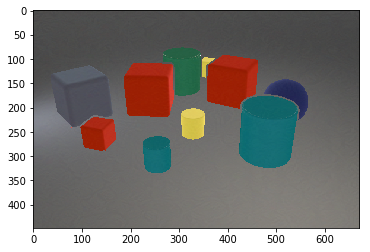

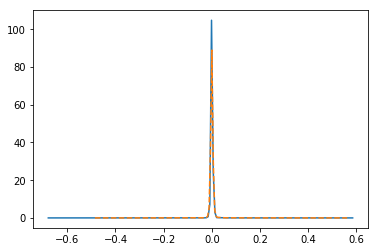

displaying: images/suc_q17_attack_normal.png


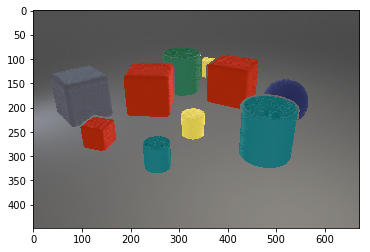

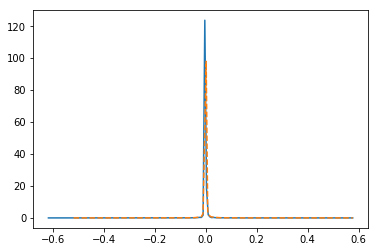

In [323]:
print('---------- original img: hist of gradient of in scale 1 and 1/2 ----------- ')

imgname = 'images/q17.png'
display_img_hist(imgname)

print('---------- adversarial img(attack img-normal): hist of gradient of in scale 1 and 1/2 ----------- ')
display_img_hist('images/suc_q17_attack_image.png') #suc_q17_attack_image.png
display_img_hist('images/suc_q17_attack_normal.png')
